In [22]:
import pandas as pd
df = pd.read_csv("p3/stats.csv")

df = df.drop('Unnamed: 0', 1)

cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

df

,full_name,season,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Steven Adams,2019-20,55.0,27.0,11.0,4.6,7.8,58.9,0.0,0.1,...,9.4,2.5,1.5,0.8,1.1,2.0,30.3,20.0,0.0,2.3
1,Bam Adebayo,2019-20,61.0,34.4,16.2,6.2,11.0,56.5,0.0,0.2,...,10.5,5.1,2.8,1.2,1.3,2.5,41.2,37.0,3.0,3.5
2,LaMarcus Aldridge,2019-20,52.0,33.0,18.8,7.3,14.8,49.5,1.2,2.9,...,7.5,2.4,1.4,0.6,1.6,2.4,36.7,14.0,0.0,-2.6
3,Kyle Alexander,2019-20,2.0,6.8,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.5,0.0,0.5,1.5,3.4,0.0,0.0,-5.0
4,Nickeil Alexander-Walker,2019-20,41.0,12.2,5.1,1.9,5.5,33.9,1.0,2.9,...,2.0,1.8,1.0,0.3,0.2,1.1,10.5,0.0,0.0,-1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,Garrett Temple,2019-20,55.0,28.1,10.3,3.6,9.5,37.8,2.0,6.3,...,3.5,2.6,1.0,0.8,0.5,1.7,21.0,1.0,0.0,-0.8
453,Daniel Theis,2019-20,54.0,23.6,9.1,3.6,6.6,55.6,0.4,1.4,...,6.6,1.6,0.8,0.6,1.3,3.5,24.4,5.0,0.0,3.3
454,Isaiah Thomas,2019-20,40.0,23.1,12.2,4.4,10.7,40.8,2.0,4.7,...,1.7,3.7,1.9,0.3,0.2,1.9,19.2,1.0,0.0,-5.0
455,Khyri Thomas,2019-20,5.0,5.1,1.4,0.4,1.2,33.3,0.4,1.0,...,0.0,0.2,0.2,0.2,0.0,0.6,2.1,0.0,0.0,-3.2


In [23]:
df_train = df.loc[:228].copy()
df_test = df.loc[229:].copy()

In [24]:
df_train = df_train[df_train['MIN'].notna()]
df_train = df_train[df_train['PTS'].notna()]

df_test = df_test[df_test['MIN'].notna()]
df_test = df_test[df_test['PTS'].notna()]



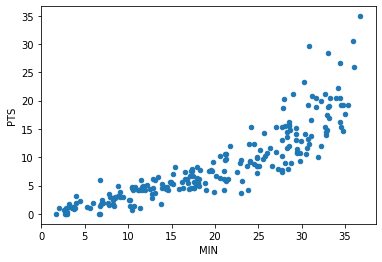

In [25]:
df_train.plot.scatter(x="MIN", y="PTS")

In [26]:
from sklearn.linear_model import LinearRegression

X_train = df_train[["MIN"]]
X_test = df_test[["MIN"]]
y_train = df_train["PTS"]

model = LinearRegression()
model.fit(X=X_train, y=y_train)
model.predict(X=X_test)

array([15.31539094, 15.84625339,  8.11925558, 13.01498702,  7.824332  ,
        6.46768353, 14.72554378, 17.14391714, 16.43610055, 14.54858963,
        7.58839314,  4.52118791,  8.70910274,  6.3497141 , 11.89427741,
       13.54584946,  0.92312023, 17.61579487, -0.55149767, -1.08236012,
        3.45946302, -0.49251296,  0.4512425 ,  9.00402632,  8.1782403 ,
        0.98210494, -0.13860466,  6.82159183, 16.14117697,  6.64463768,
        8.1782403 , 11.36341497, 10.0067665 , 11.36341497,  0.21530363,
       10.24270536,  7.70636257, 16.43610055, -0.72845182,  3.63641716,
        0.68718136, 11.77630798,  6.76260712,  7.70636257,  2.69266171,
        9.88879707,  6.17275995,  6.88057655,  4.69814205, 11.59935383,
       17.55681015,  7.17550013, 13.60483418,  3.45946302, -1.84916143,
       10.59661366, 13.84077304,  1.68992154,  0.92312023,  4.22626433,
       13.95874247,  8.00128615, 16.08219225,  8.88605689, 18.8544739 ,
        4.40321847,  4.75712677, 12.72006344,  5.40595865, 15.49

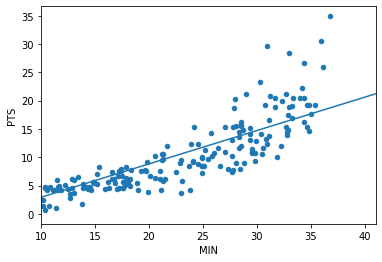

In [27]:
import numpy as np

X_new = pd.DataFrame()

X_new["MIN"] = np.linspace(10, 41, num=200)

y_new = pd.Series(
    model.predict(X_new),
    index=X_new["MIN"]
)

df_train.plot.scatter(x="MIN", y="PTS")
y_new.plot.line()